In [1]:
from pathlib import Path

In [4]:
WORKDIR = Path.cwd()
DATADIR = WORKDIR/'data'/'data_proc'

PosixPath('/Users/denis/hlam/litcode/sausage_rotation_estimation/high_level/data/data_proc')

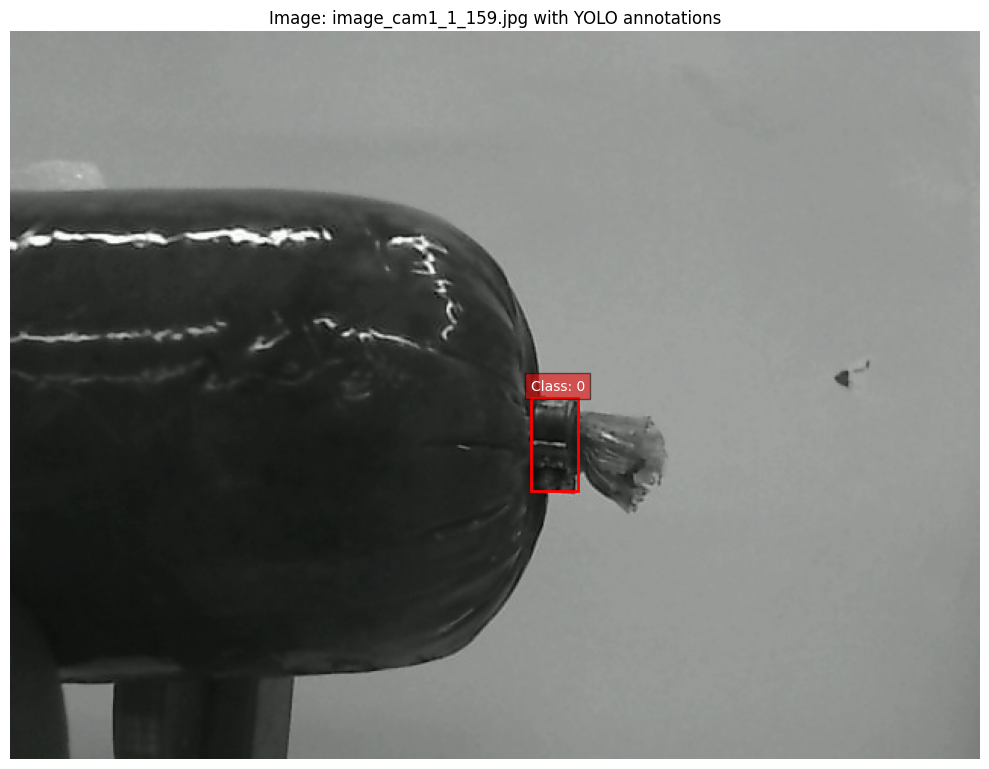

Displayed image image_cam1_1_159.jpg with its annotations


In [ ]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


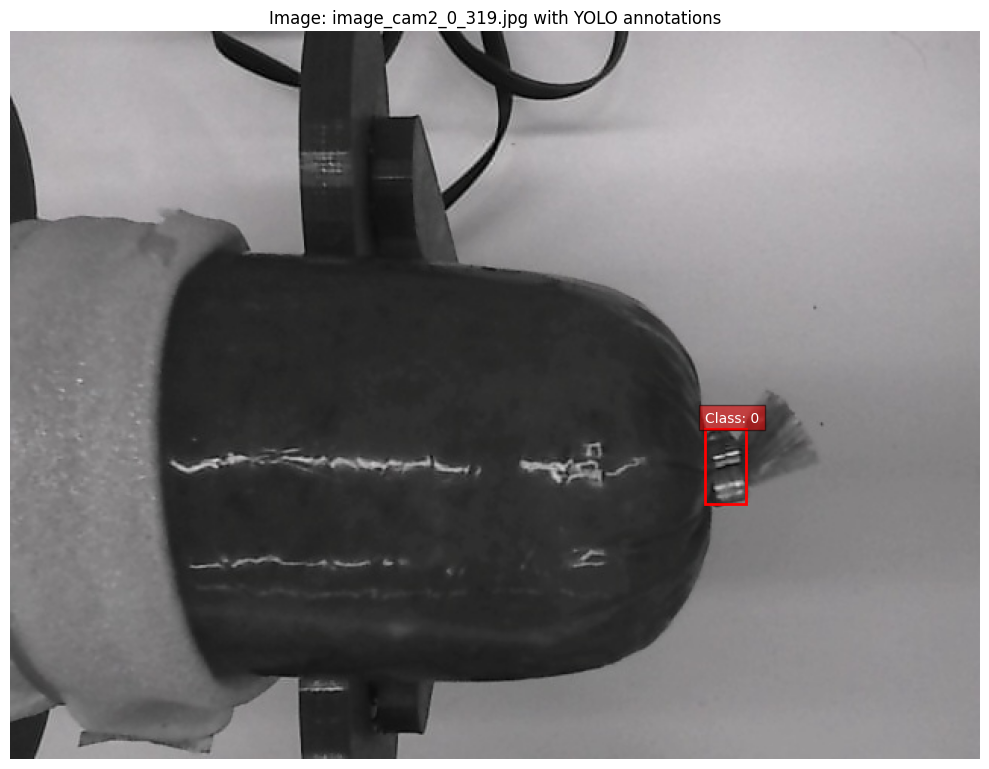

Displayed image image_cam2_0_319.jpg with its annotations


In [16]:

# Define paths to the different data directories
frames_dir = DATADIR / 'frames'
mask_areas_dir = DATADIR / 'label_areas'

# List all files in the frames directory
frame_files = list(frames_dir.glob('*.jpg'))
frame_file = frame_files[np.random.randint(0, len(frame_files))]
    
# Get the corresponding mask file (same name but in mask_areas directory)
mask_file = mask_areas_dir / (frame_file.stem + '.txt')
    
# Read the image
img = cv2.imread(str(frame_file))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Get image dimensions
img_height, img_width = img.shape[:2]

# Read the YOLO format mask file
with open(mask_file, 'r') as f:
	lines = f.readlines()

# Create figure for display
plt.figure(figsize=(10, 8))
plt.imshow(img)
        
# Process each line in the mask file (YOLO format)
for line in lines:
	# YOLO format: class x_center y_center width height
	# All values are normalized (0-1)
	values = line.strip().split()
	if len(values) >= 5:  # Ensure we have all required values
		class_id = int(values[0])
		x_center = float(values[1]) * img_width
		y_center = float(values[2]) * img_height
		width = float(values[3]) * img_width
		height = float(values[4]) * img_height
		
		# Calculate the top-left corner of the rectangle
		x1 = int(x_center - width/2)
		y1 = int(y_center - height/2)
		
		# Draw rectangle on the image
		rect = plt.Rectangle((x1, y1), width, height, 
							linewidth=2, edgecolor='r', facecolor='none')
		plt.gca().add_patch(rect)
		
		# Add class label
		plt.text(x1, y1-5, f"Class: {class_id}", 
					color='white', fontsize=10, 
					bbox=dict(facecolor='red', alpha=0.5))

plt.title(f"Image: {frame_file.name} with YOLO annotations")
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Displayed image {frame_file.name} with its annotations")
